# Chapter 4 신경망 학습

학습은 훈련 데이터로부터 최적 가중치 매개변수를 자동으로 찾아내는 것을 의미한다. 최적 가중치를 얻어내기 위해선 **손실 함수**를 이용한다. 손실 함수를 최소화하는 방향으로 학습한다.

## 4.1 데이터에서 학습한다!

Q: **퍼셉트론 수렴 정리**란?

### 4.1.1 데이터 주도 학습

기계학습은 사람의 개입을 최소화하고 데이터로부터 패턴을 찾으려고 시도한다. 특히 딥러닝은 이런 사람의 개입을 더욱 줄일 수 있다.

단순한 이미지 인식은 사람에게는 쉬운 문제일지는 몰라도, 컴퓨터가 인식할 수 있는 알고리즘을 구현해내기는 쉽지 않다. 알고리즘을 밑바닥에서부터 구현하기보다 주어진 데이터를 이용해서 **특징(feature)**을 추출하고 그 특징을 기계학습으로 학습시키는 방법이 있다. 특징은 입력 데이터로부터 중요한 의미를 가진 데이터의 일부분을 추출할 수 있는 일종의 변환기라고 할 수 있다. 이미지의 경우에는  SIFT, SURF, HOG 등을 이용해서 특징을 벡터로 표현한다. 이렇게 변환된 벡터를 갖고 SVM, KNN과 같은 지도 학습 방식의 기계학습을 할 수 있다.

기계학습에서 데이터로부터 패턴을 찾아내는 역할은 기계가 하지만 벡터로 변환하는 특징 추출 작업은 여전히 사람의 역할이다. 적합한 특징을 추출하지 못하면 좋은 결과를 내기 힘들다는 것도 일반적인 기계학습의 어려운 점 중 하나이다.

반면에 신경망은 데이터를 있는 그대로 학습한다. 이미지에서 중요한 특징을 추출해내는 작업도 기계가 알아서 한다는 것이다. 이러한 점이 딥러닝을 종단간 기계학습(end-to-end machine learning)이라고 부르는 이유이다.

### 4.1.2 훈련 데이터와 시험 데이터

기계학습은 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 한다. 우선 훈련 데이터만을 학습해서 최적의 모델을 찾는다. 그런 후 시험 데이터를 이용해서 그 모델을 평가한다. 우리의 궁극적인 목표는 한번도 보지 못 했던 데이터에서도 좋은 성능을 보이는 모델을 찾는 것이기 때문에 훈련 데이터와 시험 데이터를 나눠서 범용 능력을 평가하는 것이다.

훈련을 시키다보면 훈련 데이터셋에서는 좋은 성능을 보이지만 시험 데이터에서는 그렇지 못한 경우가 발생한다. 이런 경우를 **오버피팅(overfitting)**이라고 한다. 기계학습에서 오버피팅을 다루는 것은 매우 중요한 작업이다.

## 4.2 손실 함수

신경망의 학습에서 최적의 모델을 찾는 지표로 **손실 함수(loss function)**가 사용된다. 손실 함수는 비용 함수(cost function)이라고도 한다. 손실 함수의 예로는 평균 제곱 오차(MSE)와 교차 엔트로피 오차(cross entropy error) 등이 있다.

### 4.2.1 평균 제곱 오차

**MSE**는 가장 많이 사용되는 손실 함수이다. 수식은 다음과 같다.

$$E = \frac 1 2 \sum_k(y_k - t_k)^2$$

- $y_k$: 신경망의 출력(신경망이 추정한 값)
- $t_k$: 정답 레이블
- $k$: 데이터의 차원수

In [2]:
import numpy as np

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
# 정답이 2인 경우
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
# 2일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# 7일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [7]:
mean_squared_error(np.array(y), np.array(t))

0.5975

### 4.2.2 교차 엔트로피 오차

$$E = -\sum_k t_k logy_k$$

- $log$는 $log_e$
- y_k는 신경망 출력
- t_k는 정답 레이블(원-핫 인코딩)

정답 레이블이 원-핫 인코딩이기 때문에 정답이 아닌 나머지는 0과 곱해지기 때문에 정답일 때의 추정의 자연로그를 계산하는 식이다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Log_%282%29.svg/450px-Log_%282%29.svg.png" width=300>
<center><small>▲자연로그 그래프</small></center>

위의 그래프와 식을 보면 정답에 해당하는 출력이 커질수록 0에 다가가다가, 출력이 1일때 0이 된다.

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))    # np.log에 0을 넣으면 -inf가 되기 때문에 매우 작은 값을 더해 준다.

In [9]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0 ,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.1]

In [10]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [12]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

실제 학습을 시킬 때는 모든 데이터에서 계산한 손실 함수 값들의 합을 지표로 한다. 교차 엔트로피 오차의 식은 다음과 같이 확장된다.

$$E = - \frac 1 N \sum_n \sum_k t_{nk} logy_{nk}$$

N으로 나누어 정규화해준다(평균 손실 함수). 평균을 사용하면 데이터셋의 크기에 상관 없이 동일한 지표를 적용할 수 있다.

데이터셋이 엄청나게 커지게 되면 모든 데이터를 한번에 학습시키기 어려워진다. 그래서 사용되는 방법이 **미니배치(mini-batch)**이다. 미니배치는 데이터 중 일부만 골라 학습시킨다.

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [17]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [18]:
# 훈련 데이터에서 무작위로 10장만 선택
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [19]:
# 60000 미만의 수에서 무작위로 10개 선택
np.random.choice(60000, 10)

array([ 7455, 58305, 58978, 30040, 46643, 55938,  8324, 54648, 17077,
       35401])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [20]:
# 데이터가 1개나 그 이상의 배치로 주어지는 경우
def cross_entropy_error(y, t):
    # y가 1차원, 즉 하나의 데이터일 경우 shape을 바꿔준다.
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [21]:
# 정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

바로 위의 구현에서 핵심은 원-핫 인코딩으로 레이블이 주어졌을 때 t가 0인 원소는 교차 엔트로피 오차도 0이라 계산을 무시해도 된다는 점이다. np.arange()와 t의 원소를 이용해서 교차 엔트로피 오차를 계산해야하는 y를 찾아내서 교차 엔트로피의 합을 계산한다.

### 4.2.5 왜 손실 함수를 설정하는가?

신경망을 학습시킬 때 가중치의 미분값을 찾아서 그 값으로 가중치를 업데이트해주게 된다. 이 때 신경망이 미분 가능하도록 하기 손실 함수를 사용하는 것이다. 정확도를 지표로 삼으면 대부분의 위치에서 미분 값이 0이 되어 학습이 잘 이뤄지지 않는다.

정확도를 지표로 삼으면 미분값이 대부분 0이 되는 이유는? 정확도는 몇 개 중에 몇 개를 맞췄는지에 대한 값이다. 가중치를 조금 변경시킨다고 하더라도 바로 어떤 데이터를 맞추도록 하기는 어렵다. 만약 변한다고 하더라도 연속적인 값으로 변하지는 않는다. 하지만 손실 함수의 값은 연속적으로 변하기 때문에 정확도로 했을 때보다 학습이 더욱 잘 된다. 이와 같은 이유로 활성화 함수로 계단 함수를 이용하면 학습이 잘 이뤄지지 않는다.

만약 어떤 위치에서 가중치의 미분값이 음수이면 양의 방향으로 조금 변화시키면 손실 함수 값을 줄일 수 있을 것이다. 미분값이 양수면 반대로 해주면 손실 함수 값을 줄일 수 있다. 미분값이 0이면 더 이상 손실 함수 값을 줄여줄 수 없기 때문에 업데이트가 멈추게 될 것이다.

## 4.3 수치 미분

### 4.3.1 미분

미분은 한순간의 변화량을 표시한 것이다. 수식으로는 다음과 같다.

$$\frac {df(x)} {dx} = \lim_{h \to 0} \frac {f(x+h) - f(x)} h$$

In [29]:
# 나쁜 예: 수치 미분(numerical differenctiation)
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

위의 구현은 수치 미분을 기반으로 구현되었다. 하지만 개선할 부분이 있다.

**개선점 1. 반올림 오차**

In [23]:
np.float32(1e-50)

0.0

너무 작은 값을 사용하면 0이 되어서 문제가 된다. $10^{-4}$ 정도면 좋은 결과를 얻을 수 있다.

**개선점 2.함수 f의 차분**  
미분은 함수의 접선을 구하는 것인데 h를 무한히 0으로 좁히는 것은 현실적으로 불가능하기 때문에 결국 (x + h)와 x의 기울기를 구할 수 밖에 없다. 이 경우에는 **중심 차분**을 이용하면 오차를 줄일 수 있다. 중심 차분은 (x + h)와 (x - h)일 때의 차분을 구하는 것이다.

In [30]:
# 개선된 미분 함수
def numerical_diff(f, x):
    h = 1e-4
    return ((f(x + h) - f(x - h))) / (2*h)

수학적으로 미분 값을 구한다면 해석적 미분을 해서 진정한 미분값을 구해준다. 예를 들어 $y = x^2$의 미분은 해석적으로 $\frac {dy} {dx} = 2x$로 풀 수 있다. $x$에 찾고자하는 위치의 값을 대입하면 정확한 미분값을 구해낼 수 있다.

### 4.3.2 수치 미분의 예

$$y = 0.01x^2 + 0.1x$$

In [25]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [26]:
import numpy as np
import matplotlib.pylab as plt

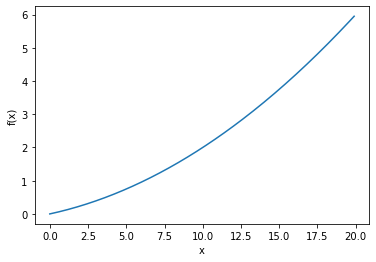

In [27]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [28]:
numerical_diff(function_1, 5)

0.1999999999990898

In [31]:
numerical_diff(function_1, 10)

0.2999999999986347

In [32]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


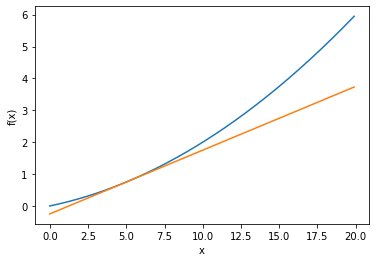

In [34]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


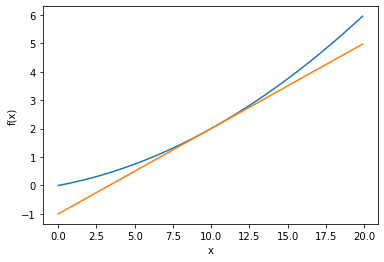

In [36]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

$$f(x_0, x_1) = x_0^2 + x_1^2$$

In [123]:
def function_2(x):
    return np.sum(x**2)

In [124]:
from mpl_toolkits import mplot3d
import matplotlib.pylab as plt

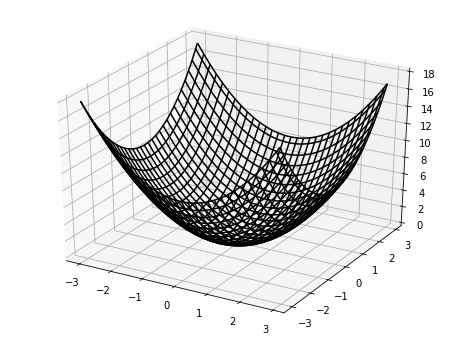

In [145]:
x0 = np.arange(-3, 3, 0.1)
x1 = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x0, x1)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.sum(np.array([X, Y])**2, axis=0), color='black')
plt.show()

위와 같이 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 한다. 편미분을 수식으로 나타내면 $\frac {\partial f} {\partial x_0}$처럼 쓴다.

**$x_0 = 3, x_1 = 4$일 때, $x_0$에 대한 편미분?**

In [146]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [147]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

**$x_0 = 3, x_1 = 4$일 때, $x_1$에 대한 편미분?**

In [148]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [149]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

편미분은 목표가 되는 변수를 제외한 다른 변수의 값을 고정한 후에 변수가 하나인 미분을 하는 식으로 풀 수 있다.

## 4.4 기울기

모든 변수의 편미분을 벡터로 정리한 것을 **기울기(gradient)**라고 한다.

In [150]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [151]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [152]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [153]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

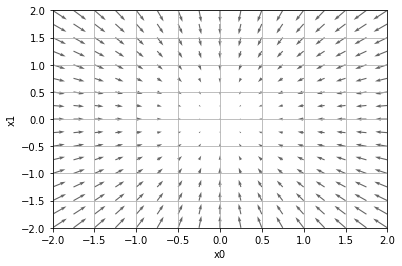

In [155]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

위의 그래프는 기울기 결과에 마이너스를 붙인 벡터의 그래프이다. 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

### 4.4.1 경사법(경사 하강법)

기계학습에서 손실함수는 너무 복잡해서 최솟값이 어느 위치에 있는지 알 수 없다. 이런 상황에서 기울기를 이용해서 최솟값을 찾으려는 것이 경사법이다.

기울기가 가리키는 방향이 반드시 최솟값이 있지는 않다.
- 최솟값
- 극솟값
- 안장점(saddle point)

**경사법 수식**
$$x_0 = x_0 - \eta \frac {\partial f} {\partial x_0}$$
$$x_1 = x_1 - \eta \frac {\partial f} {\partial x_1}$$

$\eta$는 **학습률(learning rate)**를 뜻한다. 적절한 크기의 학습률을 정하는 것이 학습에 있어서 중요하다. 학습은 이 경사법을 반복해서 수행한다.

In [167]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    '''경사 하강법
    
    input:
        f: 최적화하려는 함수
        init_x: 초깃값
        lr: learning rate
        step_num: 경사하강법 반복 횟수
    '''
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

**경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값 구하기**

In [158]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [159]:
init_x = np.array([-3.0, 4.0])

In [160]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

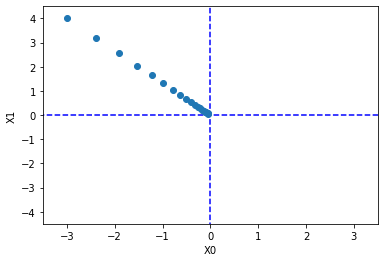

In [164]:
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [169]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    '''경사 하강법
    
    input:
        f: 최적화하려는 함수
        init_x: 초깃값
        lr: learning rate
        step_num: 경사하강법 반복 횟수
    '''
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [170]:
# 학습률이 너무 클 때: lr=10.0
init_x = np.array([-3.0, 4.0])

In [171]:
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [172]:
# 학습률이 너무 작을 때: lr= 1e-10
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

학습률 같이 사람이 직접 정해줘야 하는 매개 변수를 **하이퍼파라미터(hyper parameter)**라고 한다. 모델의 정확도는 하이퍼파라미터를 어떻게 정했는지에 따라 달라진다.

### 4.4.2 신경망에서의 기울기

신경망에서의 기울기는 가중치 매개변수 W에 대한 손실함수 L의 기울기이다. 이전과 마찬가지로 W 각 원소마다의 편미분으로 구할 수 있다. 편미분한 결과 $\frac {\partial L} {\partial W}$의 형상은 $W$와 동일하다.

In [173]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [185]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [186]:
net = simpleNet()
print(net.W)

[[ 0.40292933  1.22543226 -0.18733008]
 [-1.35276892  0.51397725 -0.3183141 ]]


In [187]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.97573443  1.19783888 -0.39888073]


In [188]:
np.argmax(p)

1

In [189]:
t = np.array([0, 0, 1])

In [190]:
net.loss(x, t)

1.8715667227277586

기울기 구하기

In [191]:
def f(W):
    # W는 더미 변수이다.
    return net.loss(x, t)

In [192]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05185793  0.45581237 -0.5076703 ]
 [ 0.0777869   0.68371855 -0.76150545]]


위의 구현은 아래와 같이 동일하게 구현할 수 있다.

In [193]:
f = lambda w: net.loss(x, t)

In [194]:
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

신경망 학습 절차
0. 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다.
1. 훈련 데이터에서 일부를 무작위로 가져온다(미니배치). 이 미니배치의 손실 함수 값을 줄이는 것이 목표
2. 각 가중치의 기울기를 구한다.
3. 가중치를 기울기 방향으로 조금 갱신
4. 1~3 반복

위의 절차처럼 미니배치로 선정해서 학습하는 방법을 **확률적 경사 하강법(stochastic gradient descent), SGD**라고 한다.

**MNIST 데이터셋 학습**

### 4.5.1 2층 신경망 클래스 구현하기